In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4
import math
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 500

In [2]:
g = '/media/rakshith/Seagate Expansion Drive/mraks/land sea ERA.nc'
#g = '/media/rakshith/Windows/Users/mraks/land sea ERA.nc'
f7 = netCDF4.Dataset(g)
h = '/media/rakshith/Seagate Expansion Drive/mraks/TGMS ERA 1959-2021, India only.nc'
#h = '/media/rakshith/Windows/Users/mraks/TGMS ERA 1959-2021, India only.nc'
f8 = netCDF4.Dataset(h)
v1 = f7['lsm'][0, :, :]

In [3]:
#Rainfall vs Pwat
X = np.linspace(1959, 2021, 63, dtype='int')
Months = ['June', 'July', 'August', 'September']

E1 = []
P1 = []
Pwat1 = []
year = [1959, 2002]
end = [1978, 2021]

for i in range(len(year)):
    a = (year[i] - 1959)*12
    b = (end[i]-1959+1)*12
    for j in range(a, b, 12):
        #for k in range(j, j+12):
        for k in range(j+5, j+9):
            sum1 = 0
            sum2 = 0
            sum3 = 0
            v8 = f8['mtpr'][k, :, :]
            v9 = f8['mer'][k, :, :]
            v10 = f8['tcwv'][k, :, :]
            sum1 = 86400*(-v9)
            sum2 = 86400*(v8)
            sum3 = v10
            x = np.multiply(v1, sum1)
            y = np.multiply(v1, sum2)
            z = np.multiply(v1, sum3)
            E1.append(np.average(x[np.nonzero(x)]))
            P1.append(np.average(y[np.nonzero(y)]))
            Pwat1.append(np.average(z[np.nonzero(z)]))

#Curve fitting
div = int((len(Pwat1))/2)
print(div)
x1, y1 = Pwat1[:div], P1[:div]
x2, y2 = Pwat1[div:], P1[div:]

80


In [4]:
from scipy.stats import binned_statistic

In [5]:
b = np.arange(0,56,2)
bin_means1, bin_edges1, binnumber1 = binned_statistic(x1, y1, statistic='mean', bins=b)
bin_means2, bin_edges2, binnumber2 = binned_statistic(x2, y2, statistic='mean', bins=b)

#standard deviation values
std1, bin_edges1, binnumber1  = binned_statistic(x1, y1, statistic='std', bins=b)
std2, bin_edges2, binnumber2  = binned_statistic(x2, y2, statistic='std', bins=b)

In [6]:
X = (bin_edges1[0:-1]+bin_edges1[1:])*0.5 #x axis

In [7]:
k=8
l=-1

Text(0.5, 1.0, '  ')

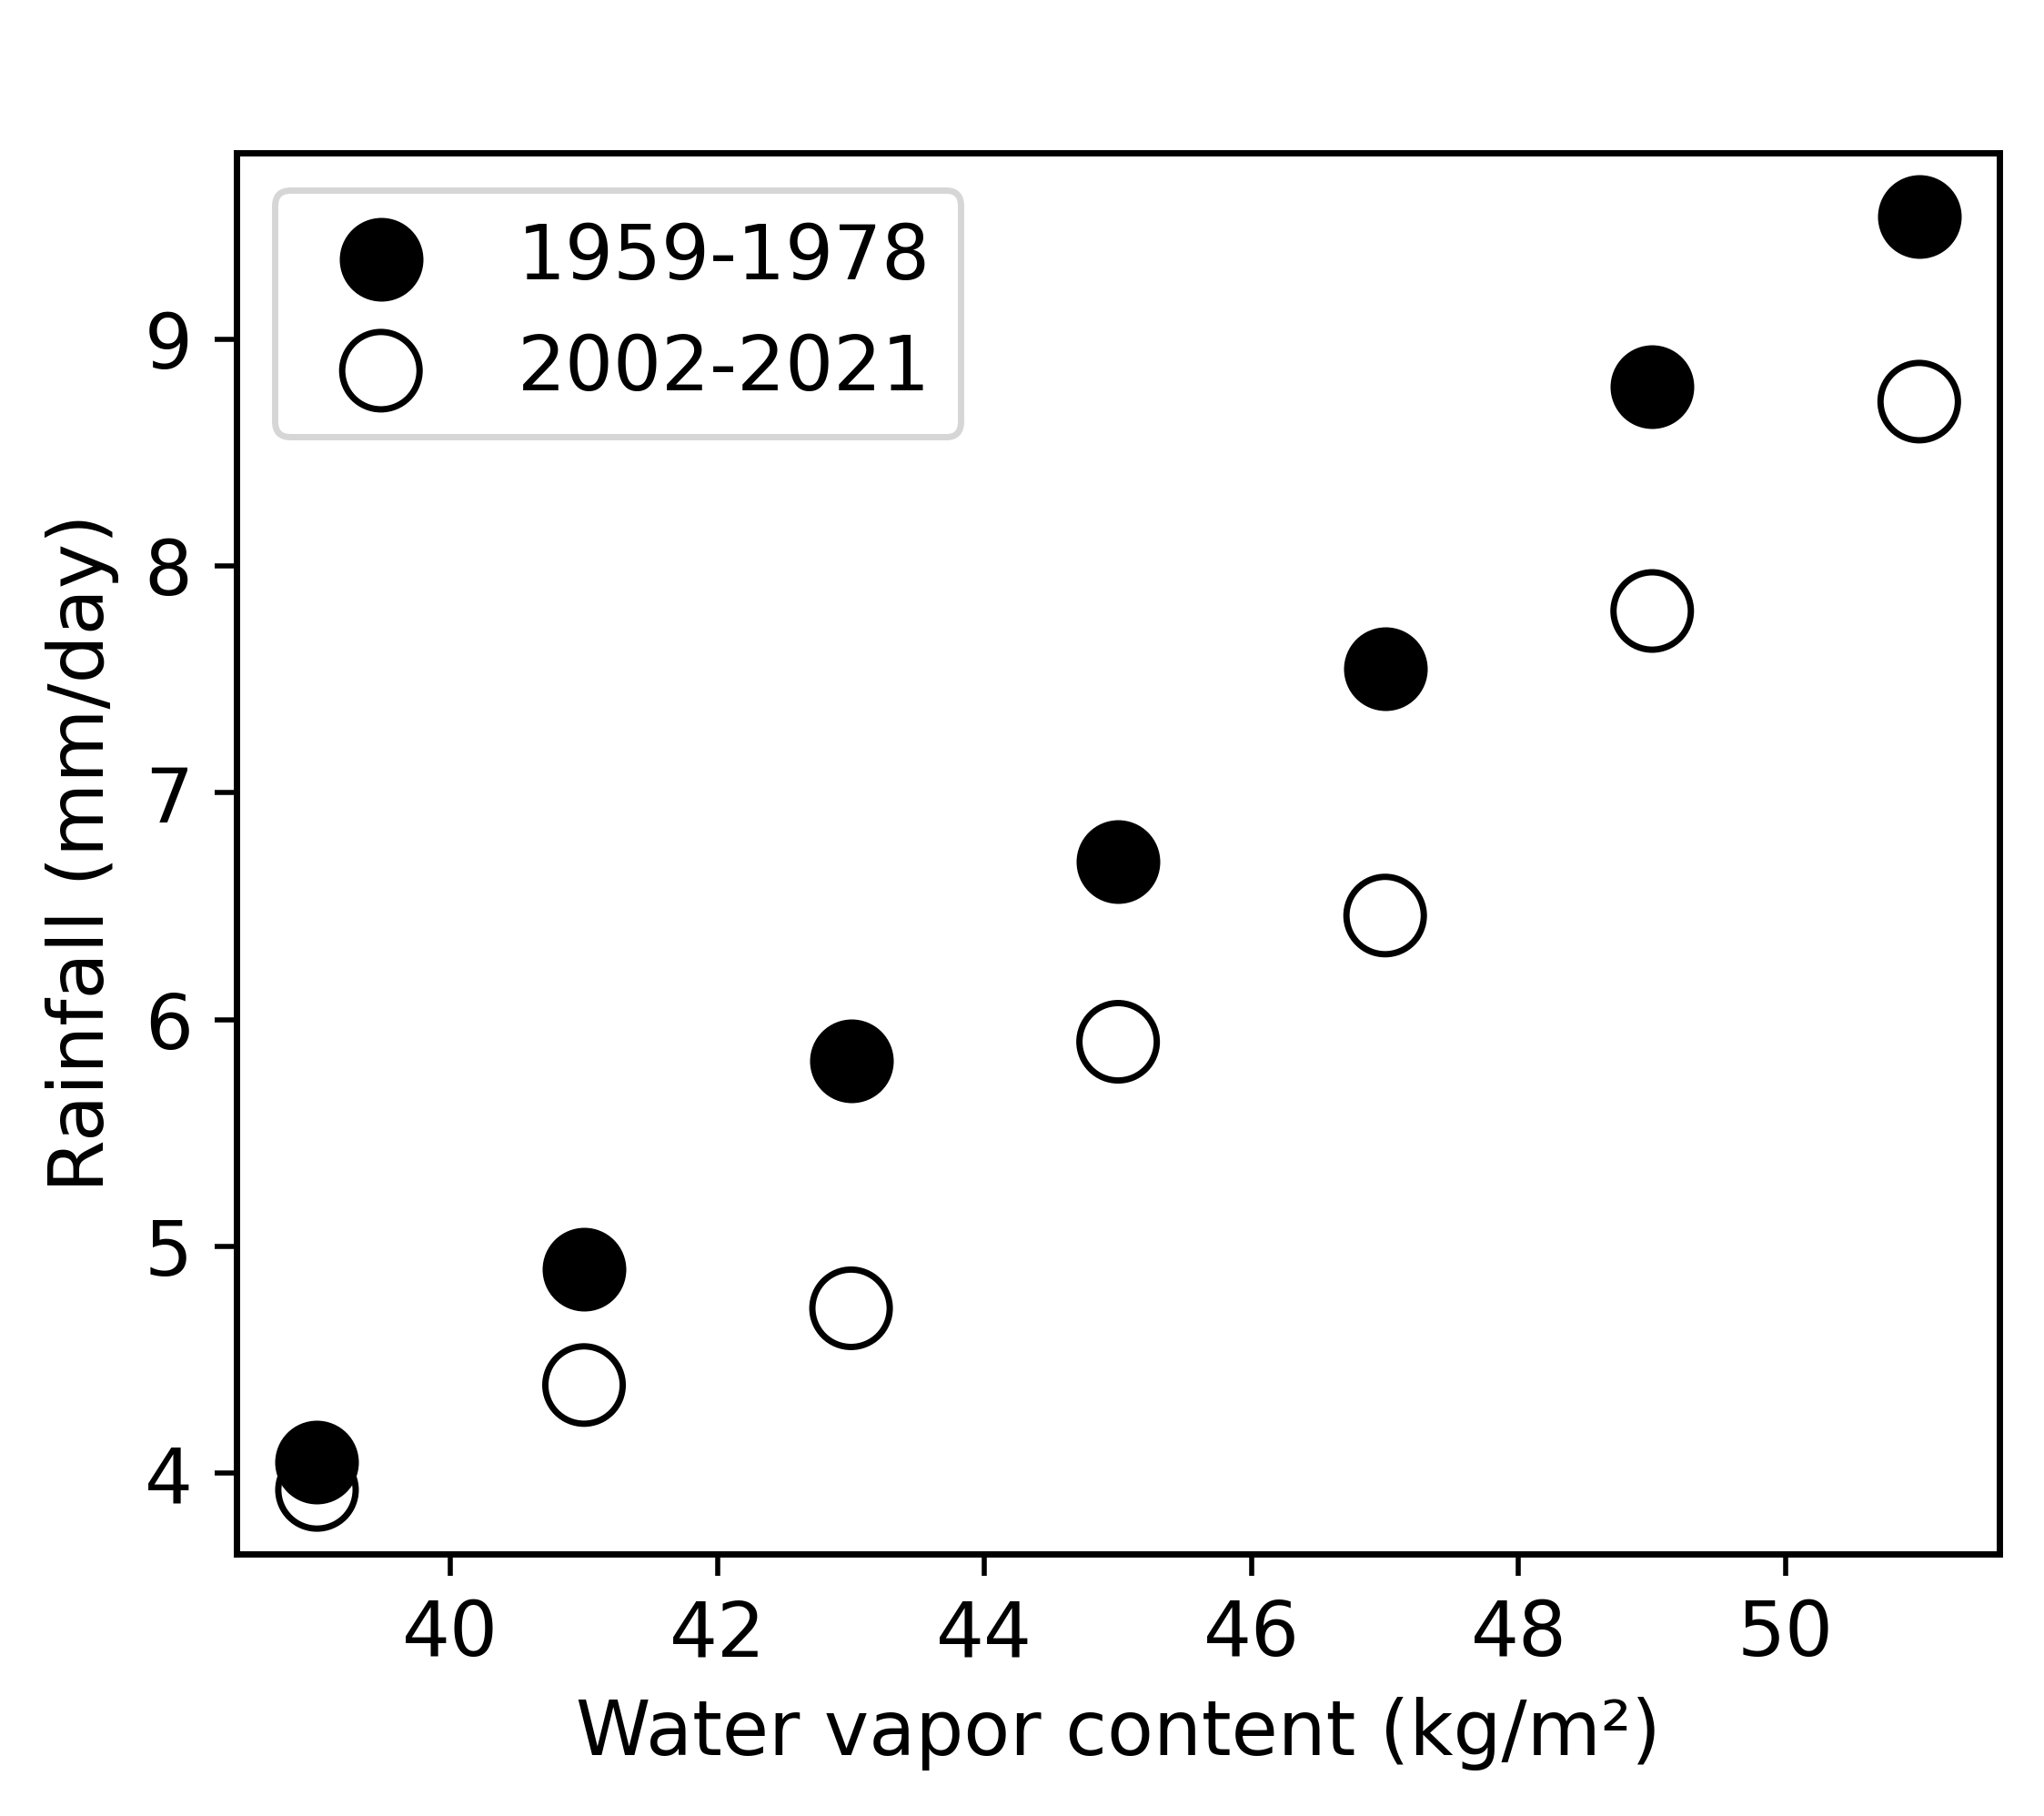

In [8]:
plt.rcParams.update({'font.size': 12})
plt.rcParams['figure.figsize'] = [5,4]
mpl.rcParams['axes.linewidth'] = 1

#plt.errorbar(X[-k:l], bin_means1[-k:l], yerr=std1[-k:l], ls='none', capsize=5, linewidth=2, markeredgewidth=2, c='black')
#plt.errorbar(X[-k:l], bin_means2[-k:l], yerr=std2[-k:l], ls='none', capsize=5, linewidth=2, markeredgewidth=2, c=col)
plt.scatter(X[-k:l], bin_means1[-k:l], c='black', marker='o', s=150)
plt.scatter(X[-k:l], bin_means2[-k:l], marker='o', facecolors='none', edgecolors='black', s=150)
plt.xlabel('Water vapor content (kg/m\u00b2)')
plt.ylabel('Rainfall (mm/day)')
#plt.title('JJAS months only, with averages from bins of 2 kg/m\u00b2 ')
plt.legend(['1959-1978', '2002-2021'])
plt.title('  ')

In [10]:
unique1, counts1 = np.unique(binnumber1, return_counts=True)
unique2, counts2 = np.unique(binnumber2, return_counts=True)

In [11]:
X1 = X[unique1[0]-1:unique1[-1]]
X2 = X[unique2[0]-1:unique2[-1]]
btm = [3,  9, 10, 10, 10,  7, 15, 14,  1] #for stacking of bar graphs

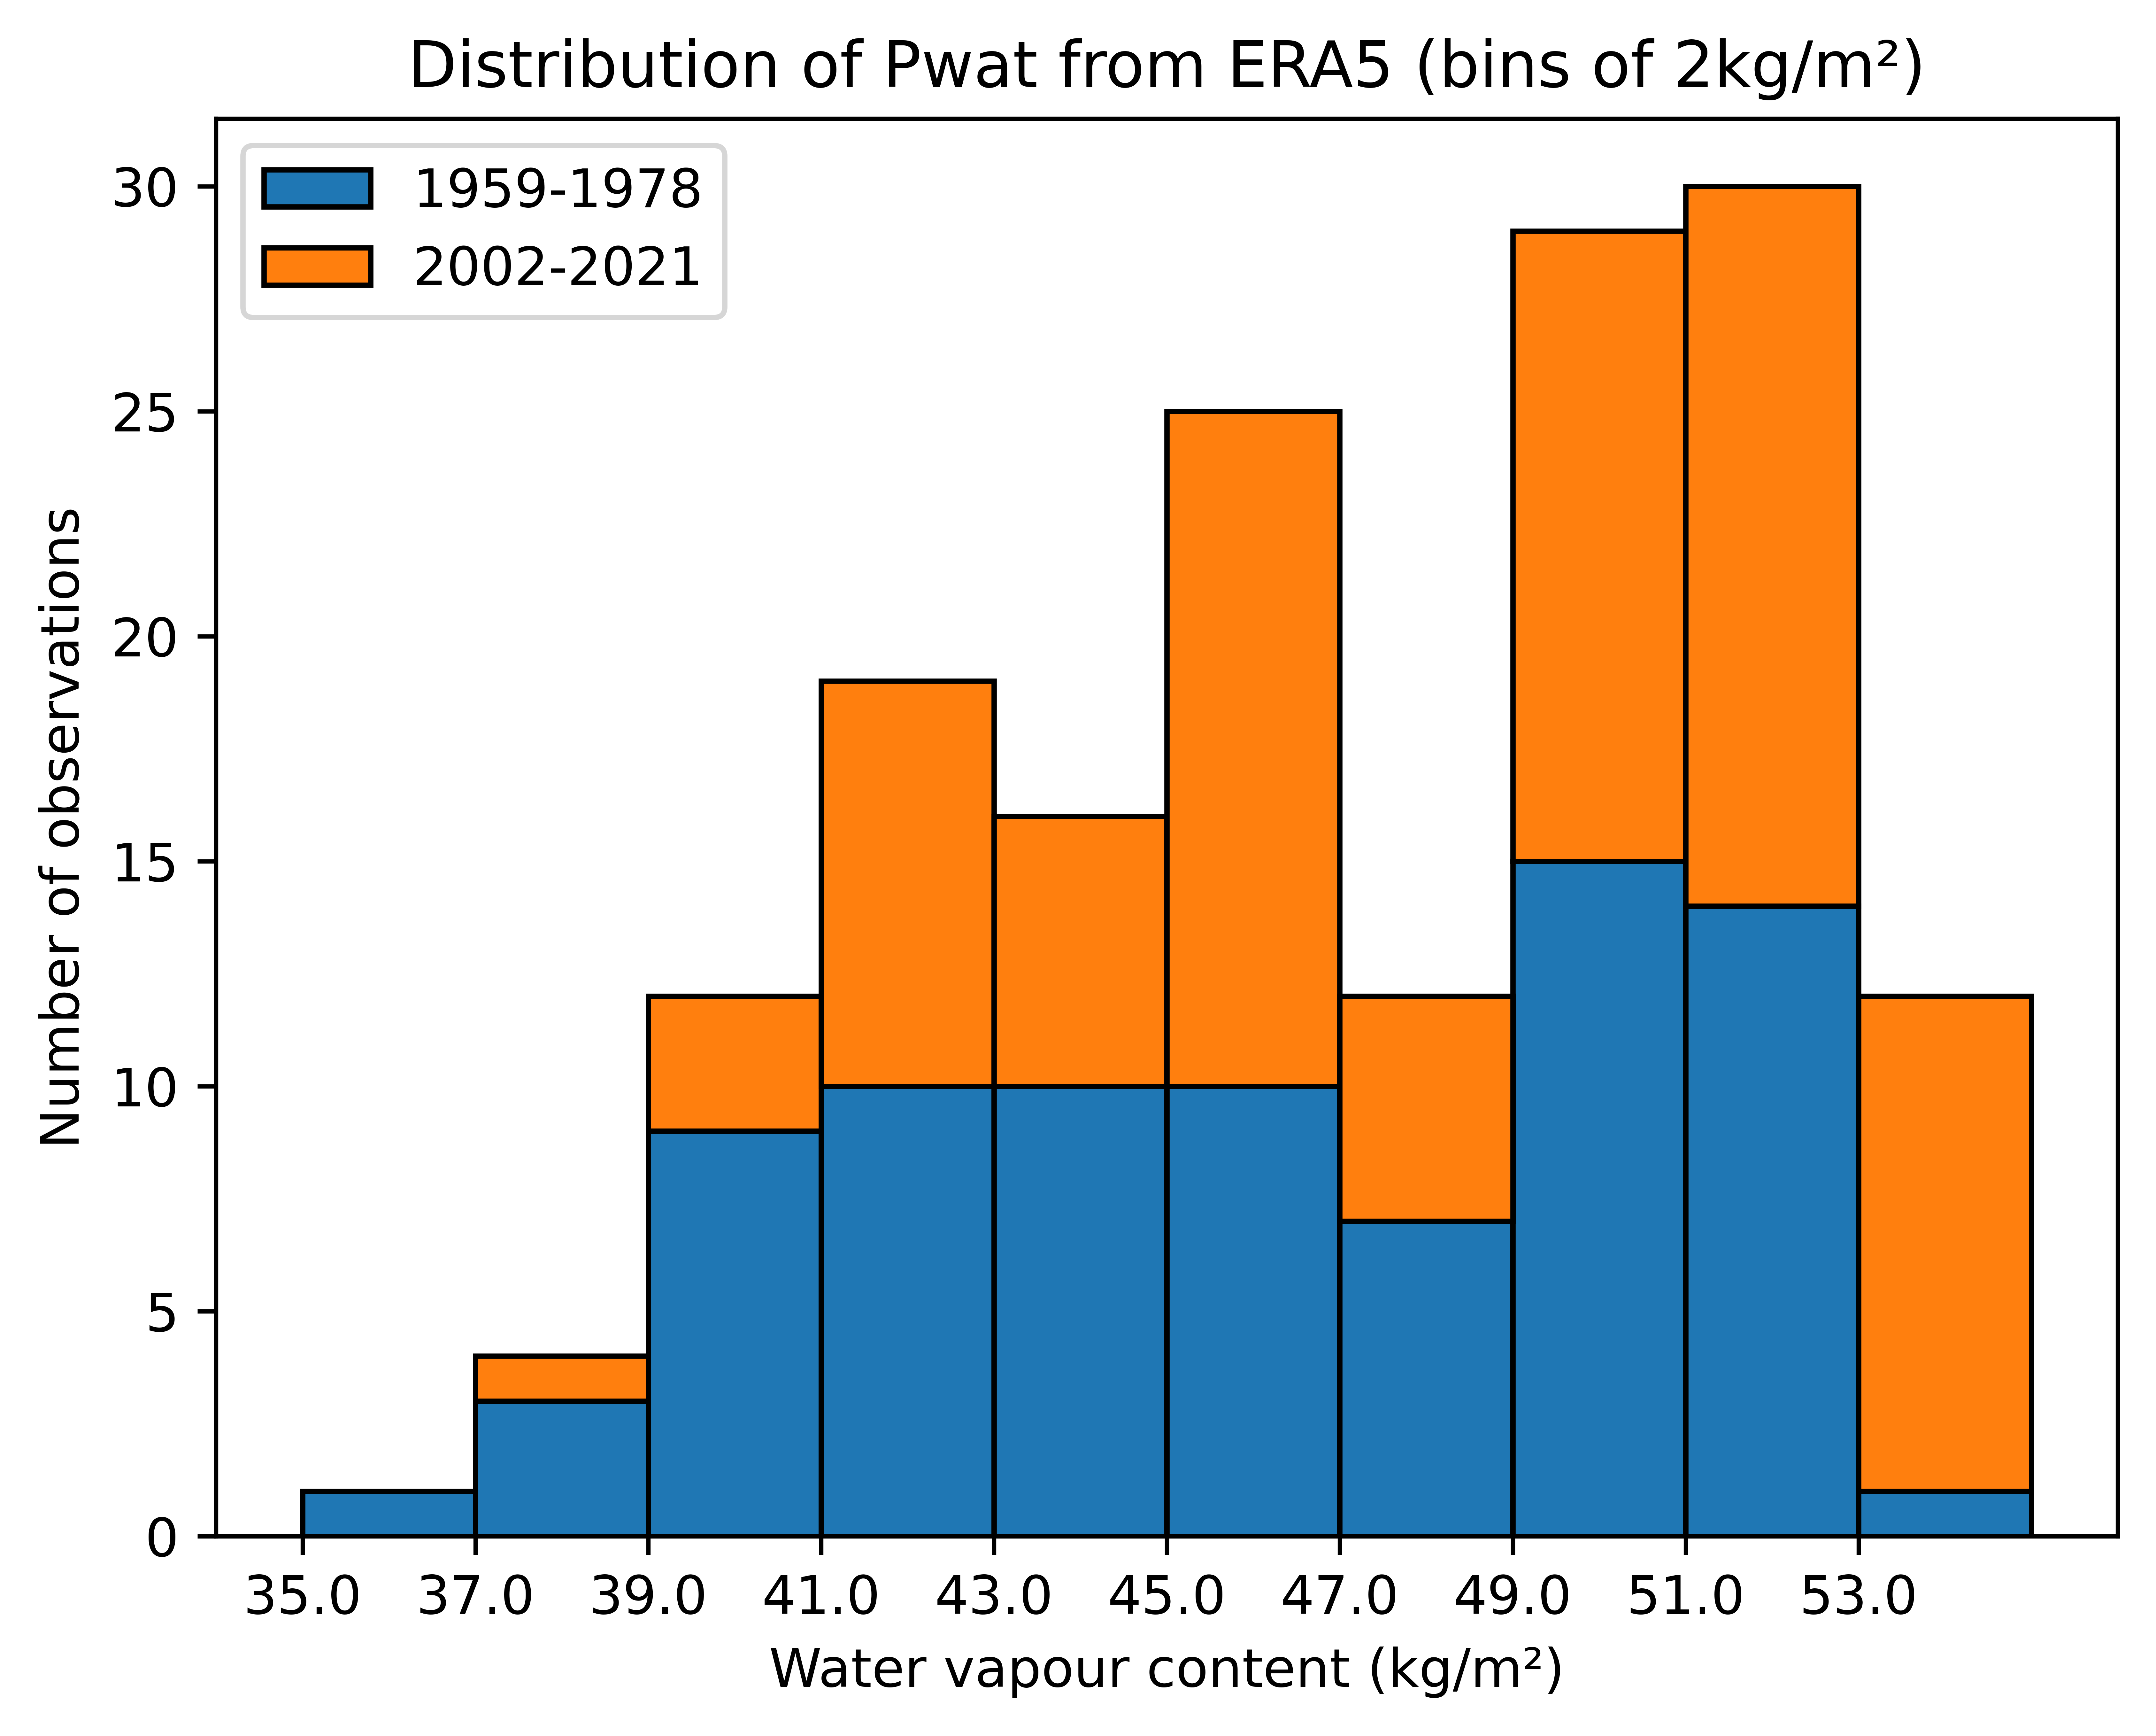

In [12]:
width1 = 1
width2 = 2
plt.bar(X1+width1, counts1, width2, edgecolor='black')
plt.bar(X2+width1, counts2, width2, bottom=btm, edgecolor='black')
plt.xticks(X1, X1)
plt.xlabel('Water vapour content (kg/m\u00b2)')
plt.ylabel('Number of observations')
plt.title('Distribution of Pwat from ERA5 (bins of 2kg/m\u00b2)')
plt.legend(['1959-1978', '2002-2021'])

In [2]:
import xarray as xr
from global_land_mask import globe
from scipy.stats import binned_statistic

In [3]:
a = '/media/rakshith/Seagate Expansion Drive/mraks/ERA Prec, Pwat all region.nc'
ds = xr.open_dataset(a)

In [15]:
sPwat1=np.array([])
sPwat2=np.array([])
sPr1=np.array([])
sPr2=np.array([])

year1='1990'
year2='2010'
clim2 = ds.sel(time=slice(year1, year2))
#India
lat1, lat2, lon1, lon2 = 30, 0, 60, 100
grid1 = clim2.sel(latitude=slice(lat1,lat2), longitude=slice(lon1,lon2))
#West pacific
lat1, lat2, lon1, lon2 = 20, -20, 190, 290
#lat1, lat2, lon1, lon2 = -20, -10, 330, 360
grid2 = clim2.sel(latitude=slice(lat1,lat2), longitude=slice(lon1,lon2))

l=[]
for i in grid2.longitude:
    if i>180:
        l.append(i-360)
    else:
        l.append(i)
                    
lon_grid, lat_grid = np.meshgrid(grid1.longitude, grid1.latitude)
mask1 = globe.is_land(lat_grid, lon_grid)
lon_grid, lat_grid = np.meshgrid(l, grid2.latitude)
mask2 = globe.is_land(lat_grid, lon_grid)
    
Pwat1 = np.array(grid1.tcwv.where(mask1>0)).flatten()
Pr1 = 86400*np.array(grid1.mtpr.where(mask1>0)).flatten()
Pwat2 = np.array(grid2.tcwv.where(mask2==0)).flatten()
Pr2 = 86400*np.array(grid2.mtpr.where(mask2==0)).flatten()
    
sPwat1 = np.append(sPwat1, Pwat1)
sPwat2 = np.append(sPwat2, Pwat2)
sPr1 = np.append(sPr1, Pr1)
sPr2 = np.append(sPr2, Pr2)

In [16]:
b = np.arange(0,81,2)
bin_means1, bin_edges1, binnumber1 = binned_statistic(sPwat1, sPr1, statistic='mean', bins=b)
bin_means2, bin_edges2, binnumber2 = binned_statistic(sPwat2, sPr2, statistic='mean', bins=b)

#standard deviation values
std1, bin_edges1, binnumber1  = binned_statistic(sPwat1, sPr1, statistic='std', bins=b)
std2, bin_edges2, binnumber2  = binned_statistic(sPwat2, sPr2, statistic='std', bins=b)

X = (bin_edges1[0:-1]+bin_edges1[1:])*0.5 #x axis

In [17]:
PWAT1 = np.array([])
PREC1 = np.array([])
PWAT2 = np.array([])
PREC2 = np.array([])
for i in range(len(X)):
    if np.isnan(bin_means1[i])==False:
        PWAT1 = np.append(PWAT1, X[i])
        PREC1 = np.append(PREC1, bin_means1[i])
    if np.isnan(bin_means2[i])==False:
        PWAT2 = np.append(PWAT2, X[i])
        PREC2 = np.append(PREC2, bin_means2[i])    

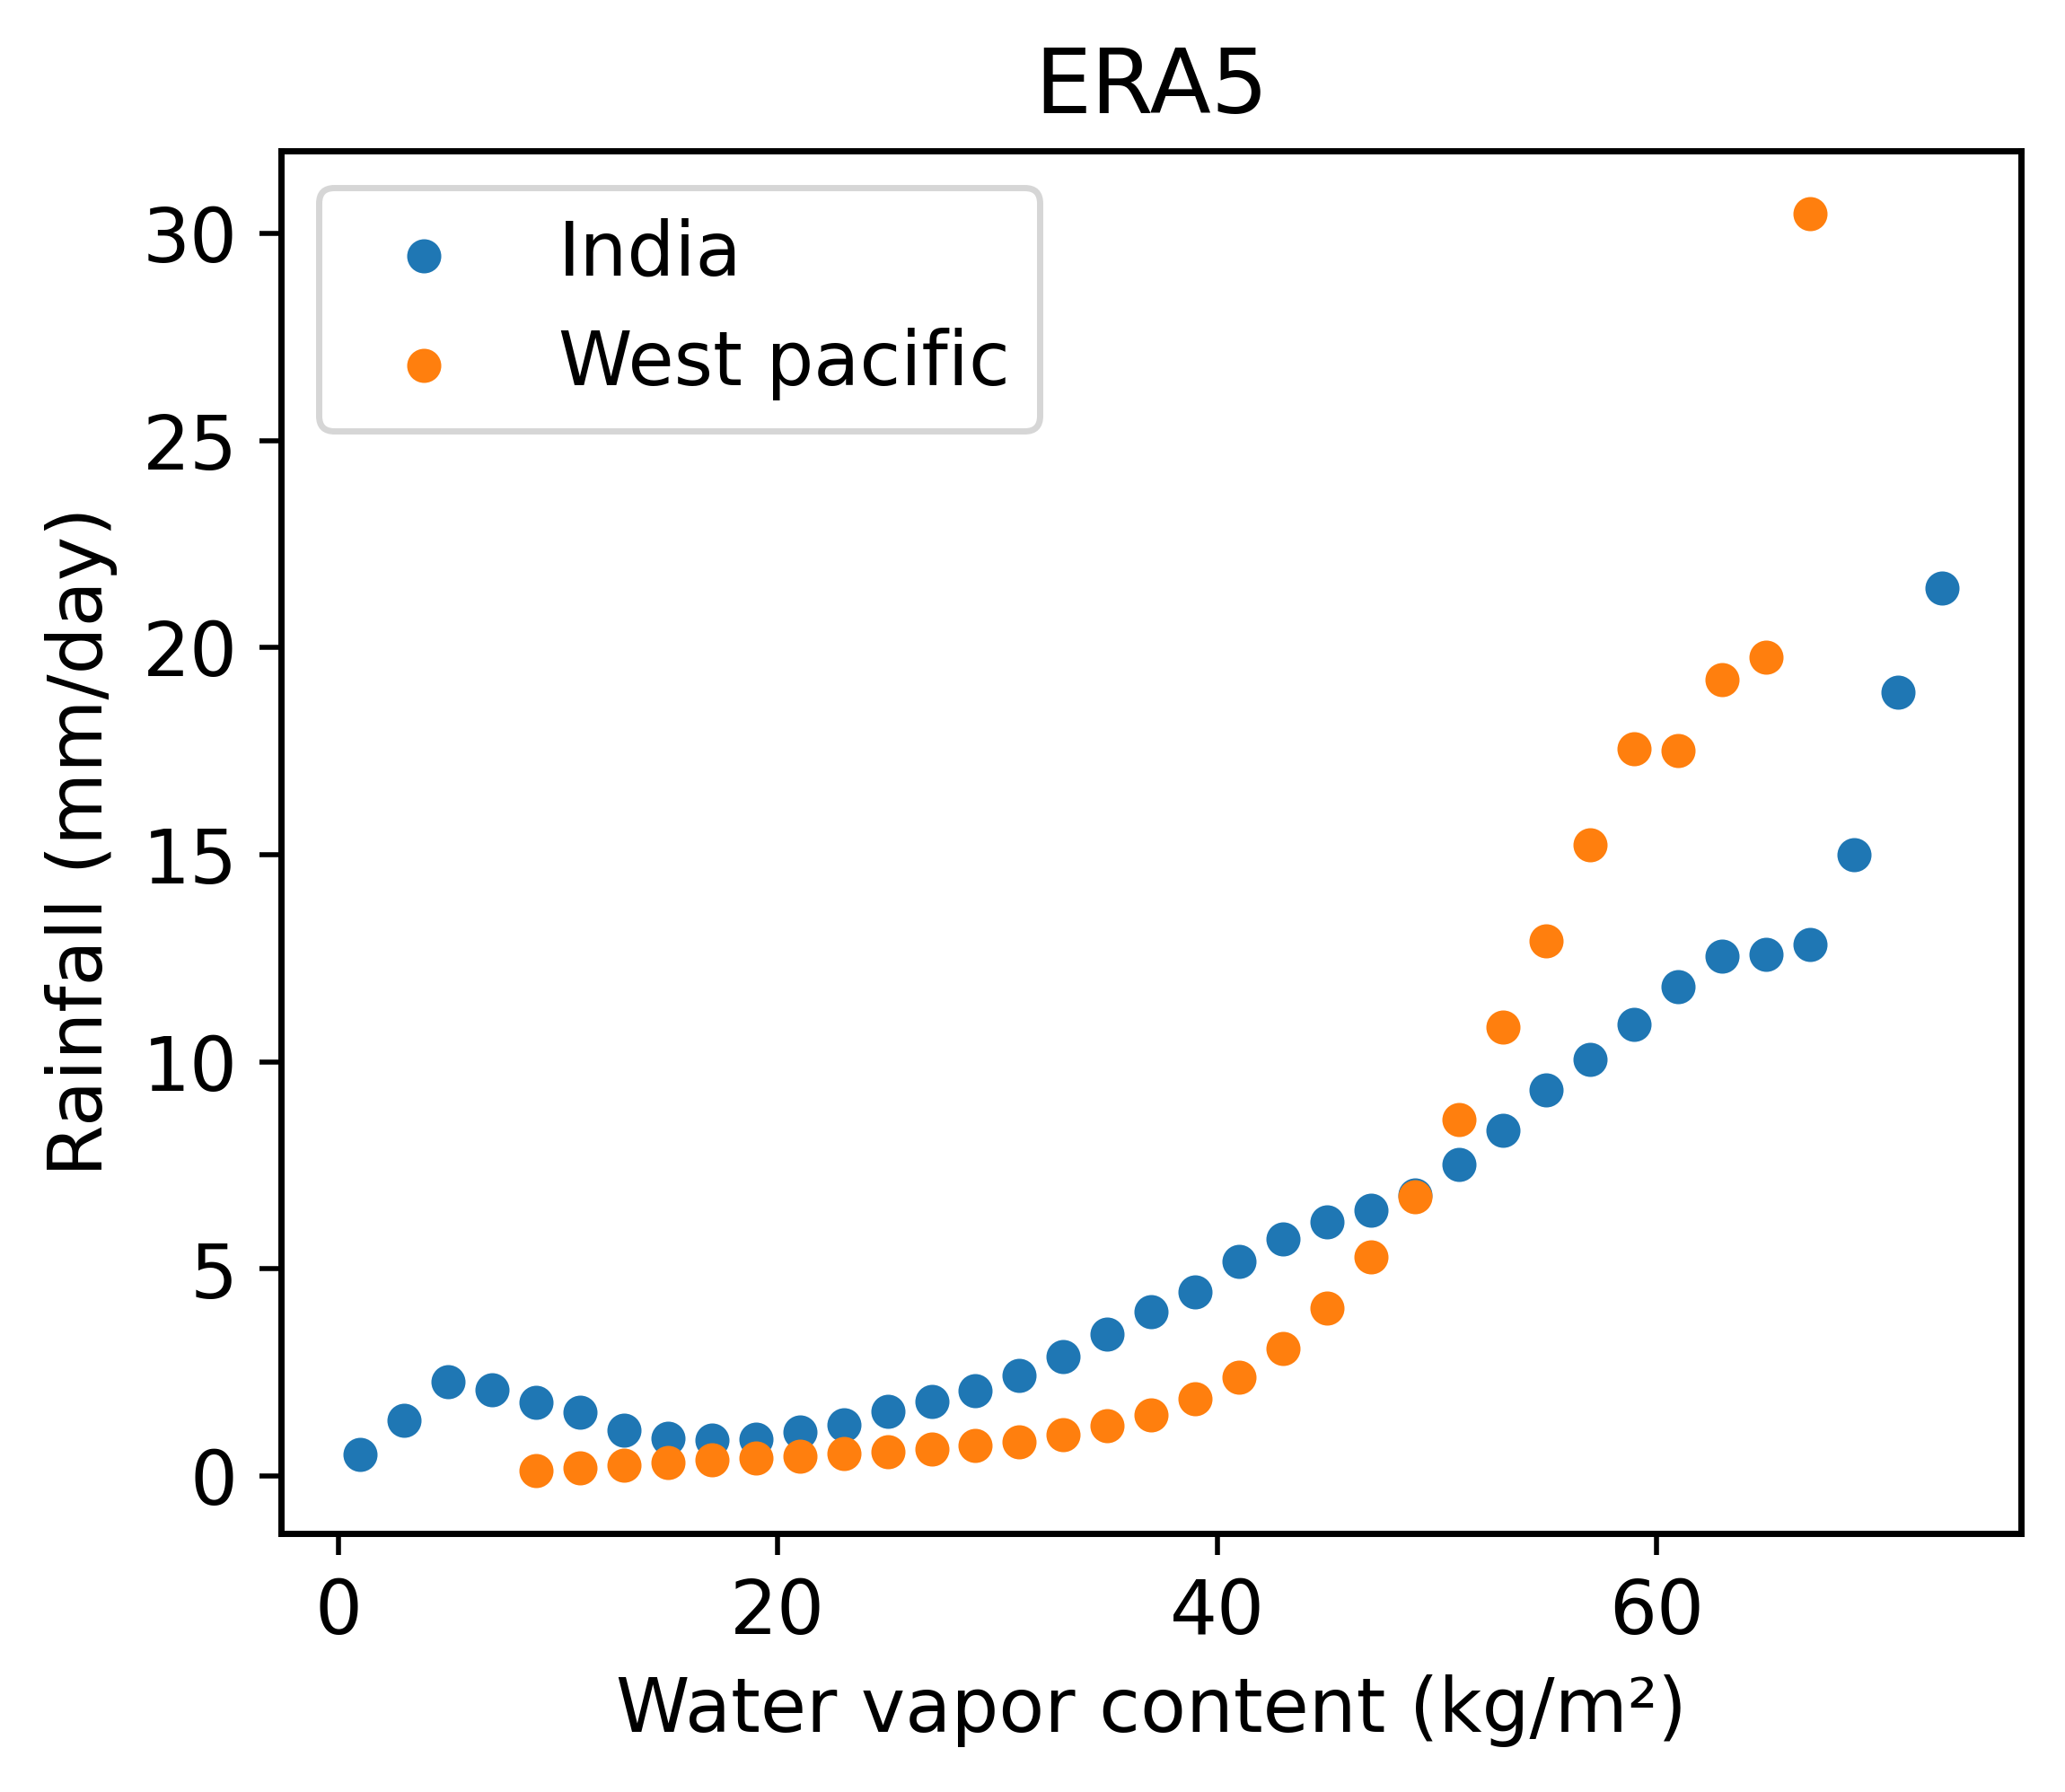

In [18]:
plt.rcParams.update({'font.size': 12})
plt.rcParams['figure.figsize'] = [5,4]
mpl.rcParams['axes.linewidth'] = 1

plt.scatter(PWAT1, PREC1, s=20)
plt.scatter(PWAT2, PREC2, c='tab:orange', s=20)
#plt.errorbar(X, bin_means1, yerr=std1, fmt="o", capsize=5)
#plt.errorbar(X, bin_means2, yerr=std2, fmt="o", capsize=5)
plt.xlabel('Water vapor content (kg/m\u00b2)')
plt.ylabel('Rainfall (mm/day)')
plt.title('ERA5')
plt.legend(['India', 'West pacific'])